# 0 - Imports

In [17]:
from tensorflow.keras import datasets, layers, models, optimizers, utils
import numpy as np

# 1 - Paramètres

In [6]:
NUM_CLASSES = 10

# 2 - Préparation des données

In [12]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

# mlp likes variation in [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# go one hot encoded
y_train = utils.to_categorical(y_train, NUM_CLASSES);
y_test = utils.to_categorical(y_test, NUM_CLASSES);


# 3 - Construction du modèle

In [13]:
input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

# 4 - Entraînement du modèle

In [15]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True, 
    validation_data = (x_test,y_test)
)

2024-08-27 15:44:47.153651: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5538 - accuracy: 0.4522 - val_loss: 1.2906 - val_accuracy: 0.5433
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1497 - accuracy: 0.5945 - val_loss: 1.0881 - val_accuracy: 0.6110
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0014 - accuracy: 0.6500 - val_loss: 0.9576 - val_accuracy: 0.6699
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9188 - accuracy: 0.6814 - val_loss: 0.9080 - val_accuracy: 0.6821
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8515 - accuracy: 0.7009 - val_loss: 0.8700 - val_accuracy: 0.6943
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8025 - accuracy: 0.7210 - val_loss: 0.8702 - val_accuracy: 0.6937
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7599 - accuracy: 0.7372 - val_loss: 0.9297 -

# 5 - Evaluation du modèle

In [18]:
model.evaluate(x_test, y_test, batch_size=1000)

CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 4s 13ms/step


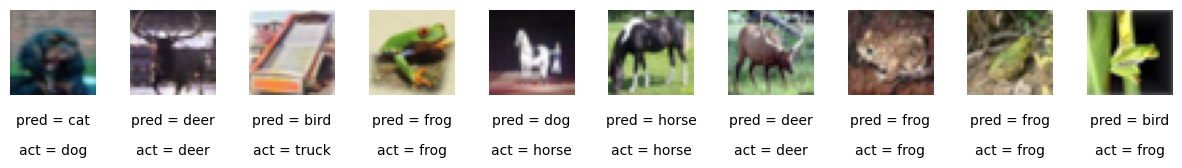

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)